In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
df = pd.read_csv('./Datasets/milknew.csv')

In [3]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [4]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [5]:
df['Grade']=df['Grade'].map({'low':0,'medium':1,'high':2})

<BarContainer object of 1059 artists>

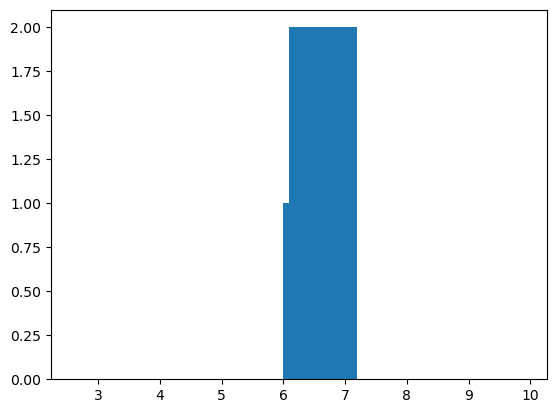

In [6]:
plt.bar(df['pH'],df['Grade'])

(array([480.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 579.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

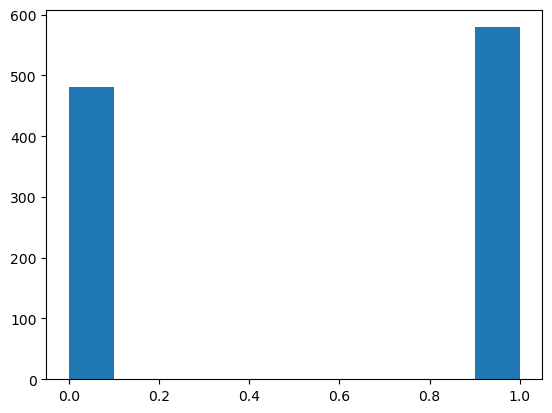

In [7]:
plt.hist(df['Taste'])

(array([ 70.,   0.,  57.,  23.,  19., 680.,  39.,  24.,  62.,  85.]),
 array([3.  , 3.65, 4.3 , 4.95, 5.6 , 6.25, 6.9 , 7.55, 8.2 , 8.85, 9.5 ]),
 <BarContainer object of 10 artists>)

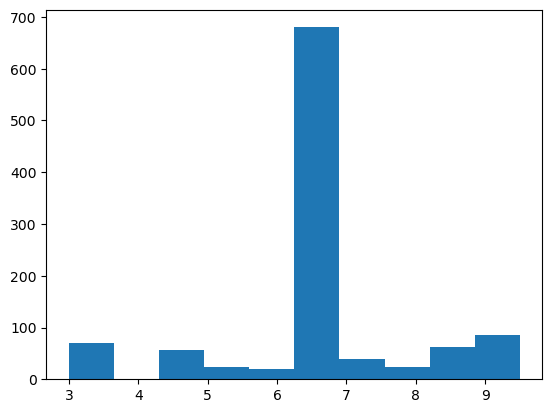

In [8]:
plt.hist(df['pH'])

In [9]:
df_Grade_bw_6_9 = df['Grade'][df['pH']>6]
df_Grade_bw_6_7 = df['Grade'][df['pH']<7]
df_Grade_bw_6_7.value_counts()                            

1    374
2    256
0    219
Name: Grade, dtype: int64

(array([ 32.,   0.,   0., 115.,  92.,  23., 146.,   0.,  22., 629.]),
 array([240. , 241.5, 243. , 244.5, 246. , 247.5, 249. , 250.5, 252. ,
        253.5, 255. ]),
 <BarContainer object of 10 artists>)

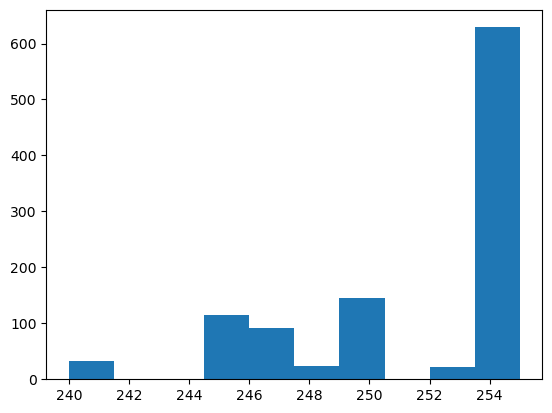

In [10]:
plt.hist(df['Colour'])

(array([276.,   0.,   0.,   0.,   0., 195.,   0.,   0.,   0., 158.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

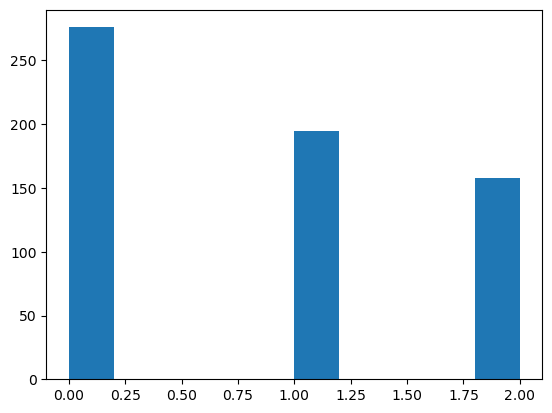

In [11]:
plt.hist(df['Grade'][df['Colour']>253])

In [12]:
x = df.drop(['Grade'],axis=1)
y = df['Grade']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.svm import SVC
svc = SVC()
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [15]:
from sklearn.metrics import classification_report

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [17]:
svc.fit(x_train_scaled,y_train)
y_pred_svc = svc.predict(x_test_scaled)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        69
           1       0.97      0.87      0.92        77
           2       0.83      0.98      0.90        66

    accuracy                           0.93       212
   macro avg       0.93      0.93      0.93       212
weighted avg       0.94      0.93      0.93       212



In [18]:
svc.score(x_test_scaled,y_test)

0.9292452830188679

In [19]:
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        69
           1       0.98      0.53      0.69        77
           2       0.62      0.98      0.76        66

    accuracy                           0.80       212
   macro avg       0.86      0.81      0.80       212
weighted avg       0.87      0.80      0.80       212



In [20]:
gnb.score(x_test,y_test)

0.8018867924528302

In [21]:
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.97      1.00      0.99        77
           2       1.00      0.98      0.99        66

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [22]:
dtc.score(x_test,y_test)

0.9905660377358491

In [23]:
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.97      1.00      0.99        77
           2       1.00      0.98      0.99        66

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [24]:
rfc.score(x_test,y_test)

0.9905660377358491

In [25]:
gbc.fit(x_train,y_train)
y_pred_gbc = gnb.predict(x_test)
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        69
           1       0.98      0.53      0.69        77
           2       0.62      0.98      0.76        66

    accuracy                           0.80       212
   macro avg       0.86      0.81      0.80       212
weighted avg       0.87      0.80      0.80       212



In [34]:
gbc.score(x_test,y_test)

0.9905660377358491

In [26]:
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.97      0.99      0.98        77
           2       0.99      1.00      0.99        66

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [27]:
knn.score(x_test,y_test)

0.9858490566037735

In [28]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,1
1055,6.7,38,1,0,1,0,255,2
1056,3.0,40,1,1,1,1,255,0
1057,6.8,43,1,0,1,0,250,2


In [29]:
knn.predict([[6.6,32,0,0,1,0,255]])

C:\Users\atifa\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [30]:
def predict(pH,Temperature,Taste,Odor,Fat,Turbidity,Colour):
    prediction = knn.predict([[pH,Temperature,Taste,Odor,Fat,Turbidity,Colour]])
    if prediction==0:
        print("Quality is Low")
    elif prediction==1:
        print("Quality is Medium")
    else:
        print("Quality is High")

In [39]:
x_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
505,6.6,38,0,0,0,0,255
928,6.6,45,0,0,0,1,250
650,6.8,45,0,1,0,0,240
626,6.5,40,1,0,0,0,250
443,6.8,45,1,1,1,1,245
...,...,...,...,...,...,...,...
1033,6.6,38,0,0,0,0,255
763,5.6,50,0,1,1,1,255
835,4.7,38,1,0,1,0,255
559,9.0,43,1,0,1,1,250


In [42]:
gbc.predict([[6.6,32,0,0,1,0,255]])

C:\Users\atifa\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [32]:
import pickle

In [33]:
pickle.dump(knn,open('knn_model.pkl','wb'))

In [35]:
pickle.dump(gbc,open('gbc_model.pkl','wb'))